In [ ]:
# Kết nối Google Colab vào Google Drive
from google.colab import drive
drive.mount("/content/drive")
# Chuyển đến thư mục làm việc
%cd /content/drive/MyDrive/Lecture_CNTT_2020/Bai giang AI 2020/Bai giang cho giao vien/AI.Code

Mounted at /content/drive
/content/drive/MyDrive/Lecture_CNTT_2020/Bai giang AI 2020/Bai giang cho giao vien/AI.Code


In [ ]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
# get data
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

X = data[:, 0:3]
y = data[:, 3:4]
maxy = np.max(y)
miny = np.min(y)
avgy = np.mean(y)
print(maxy)
print(miny)
print(avgy)
N = data.shape[0]
# normalize data
maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

# get X bar [1,X]
X_b = np.c_[np.ones((N, 1)), X]



27.0
1.6
15.130500000000001


In [ ]:

def mini_batch_gradient_descent():
    epoch_max = 50
    minibatch_size = 1
    learning_rate = 0.01
    # get random theta
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]
    losses = []
    for epoch in range(epoch_max):
        # shuffle data
        shuffled_indices = np.random.permutation(N)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            # predict y_hat
            y_hat = xi.dot(thetas)

            # compute loss
            loss = (y_hat - yi) ** 2

            # compute gradient for loss
            d_loss = 2 * (y_hat - yi) / minibatch_size

            # compute gradient for param
            gradients = xi.T.dot(d_loss)

            # update
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses


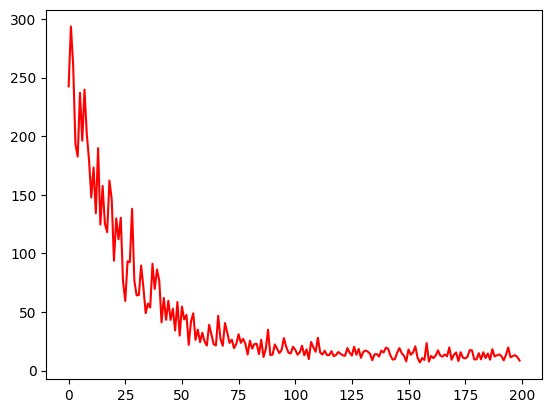

In [ ]:
mbgd_thetas, losses = mini_batch_gradient_descent()

# in loss cho 100 sample đầu
x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()